In [1]:
!pip install pytube 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 2.6 MB/s eta 0:00:00


**Imporation des bibliothèques**

In [6]:
import urllib.request
import pytube
from urllib.request import Request, urlopen
import json

**On télécharge la video à partir de l'URL**

In [7]:
yt = pytube.YouTube("https://www.youtube.com/watch?v=uReO30lD2eU")
video = yt.streams.first()
video.download("/path/to/save/video")

'/path/to/save/video/Marvels Avengers - Co-op War Zones Trailer  PS4.3gpp'

**Nous recupérons le titre et la description de la video**

In [8]:
title = yt.title
description = yt.description
print(title)
print(description)

Marvel's Avengers - Co-op War Zones Trailer | PS4
https://www.playstation.com/games/marvels-avengers/?emcid=or-1s-412983

Assemble online with up to three other players to take on AIM and show them what Earth's Mightiest Heroes can do in the face of evil.


In [18]:
url = "https://www.googleapis.com/youtube/v3/commentThreads"
api_key= "ya29.a0AX9GBdWz5XqRA-1jWnPkrKWWoE1rnxZaAR_v8EggVynEi1ZtoRsPtiKHFLxhrFJdvEfK7zkk7nv8yOE5aJuDbkTr40Nh5E4tY6GAwoRg8hFR38ro1idFzIiRZmW1k1n4zvA2rBCOfRCovQe3rJGue7uqu4lZaCgYKAR8SARMSFQHUCsbCV_SYCsT0ZqsIA0mMXvZ7Tw0163"
video_id='uReO30lD2eU'
pms = {'part': 'snippet', 'videoId' : 'uReO30lD2eU', 'maxResults' : 100, 'access_token': api_key}

query_string = urllib.parse.urlencode(pms)
req = urllib.request.Request(url + '?' + query_string)
response = urllib.request.urlopen(req)
data = json.loads(response.read())

print(data)

{'kind': 'youtube#commentThreadListResponse', 'etag': 'UCINb9tSTC84f-kiKNrjEM4VCQo', 'nextPageToken': 'QURTSl9pMmVSOUFjWnN4eGZpcVFPRWdWZU5ieUNCMVV1THFZbDl5S3pUR0pla3g1OFRKd0FIbGcxUUhQNU8xbkNtaTdXUUtiOUhjXzVjTQ==', 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100}, 'items': [{'kind': 'youtube#commentThread', 'etag': 's6D12ywC_MImoPQN7Cy0M9LLKBg', 'id': 'UgzkiYLCOyxRjmbjXF94AaABAg', 'snippet': {'videoId': 'uReO30lD2eU', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'AbW6uck5vcPiNCNM5hgF0IJaeyM', 'id': 'UgzkiYLCOyxRjmbjXF94AaABAg', 'snippet': {'videoId': 'uReO30lD2eU', 'textDisplay': 'I love how quirky and funny this game is 👍', 'textOriginal': 'I love how quirky and funny this game is 👍', 'authorDisplayName': 'IAmJavid', 'authorProfileImageUrl': 'https://yt3.ggpht.com/oz8uFxoBQQXhbSjq6qTAc4xtAnyINiu75vEkhrTpl5_J43XboERTSsPUnAJonidhkkORfik5Fg=s48-c-k-c0x00ffffff-no-rj', 'authorChannelUrl': 'http://www.youtube.com/channel/UCzF7a9p_LpaIH61WZPSMrmg', 'authorChannelId': {'valu

**# Extraction des commentaires de la réponse de l'API**

---



In [22]:
comments = []
for item in data["items"]:
    comments.append(item["snippet"]["topLevelComment"]["snippet"]["textDisplay"])
print(comments)

['I love how quirky and funny this game is 👍', 'It’ll be fine', 'Not enough content or characters. Or pvp. Ill pass on spending $80+', 'Getting anthem vibes off this', 'They should most definitely find a way to add Black Panther', 'It&#39;s boring af', 'It looks disappointing. Big loss for Marvel. They should&#39;ve went exclusive.', 'Hi there, i know a dependable service to enhance your views naturally for thousend is at 1.48 so the service is called <b>RazorViews</b>', 'Hi there, i know a trusted service to raise your views naturally for thousend it&#39;s 1.82 so the service is called <b>RazorViews</b>', 'Everyone worrying about advertising im just glad they actually chose to take their time with the game💯💯. Can&#39;t wait to play next month with all the upcoming dlc', 'where&#39;s cap?', 'Enfin un Marvel en full 3D un vrai jeux pas que avec la vue plafond la', 'Dislike and unrespect in response to ps plus games for Russia in august', 'reminded me of xmen legends * - *', 'Gomu Gomu n

In [23]:
# !pip install afinn

from textblob import TextBlob # pour l'analyse des seniments, elle propose des scores entre -1 et 1
from afinn import Afinn # de même, son score varie entre -5 et 5

# Calcul des scores de sentiments pour chaque commentaire
blob_scores = []
afinn_scores = []
for comment in comments:
    blob = TextBlob(comment)
    afinn = Afinn()
    blob_scores.append(blob.sentiment.polarity)
    afinn_scores.append(afinn.score(comment))
print(blob_scores)
print(afinn_scores)

[0.0875, 0.4166666666666667, -0.25, 0.0, 0.11111111111111112, -1.0, -0.3, 0.1, 0.1, 0.16666666666666666, 0.0, 0.35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999999999999, 0.0, 0.0, -0.75, 0.0, 0.15, 0.0, 0.7333333333333334, 0.5, -0.025000000000000022, 0.0, -0.06666666666666665, 0.0, 0.13636363636363635, 0.15416666666666665, 0.0, 0.0, -0.4, 0.0, 0.1, -0.1875, 0.0, 0.0, 0.0, 0.0, -0.4, -0.6000000000000001, 0.0, 0.0, 0.0, 0.0, -0.4, 0.16666666666666666, -0.4, -0.5, 0.06666666666666667, 0.10000000000000002, 0.0, 0.3333333333333333, 0.0, 0.0, -0.45, 0.0, -0.1875, -0.5, 0.0, 0.06571428571428573, 0.0, 0.3, 0.8, 0.0, -0.28712121212121217, 0.0, -0.375, 0.15833333333333335, 0.0, 0.3, 0.08333333333333333, 0.0, 0.0, 0.0, -1.0, -0.08333333333333333, 0.0, -0.41875, -0.2, 0.0, 0.0, 0.1, 0.0, -0.4366666666666666, 1.0, -0.18125000000000002, -0.6999999999999998, -0.4666666666666666, 0.0, 0.0, 0.0, -0.32552083333333326, 0.0, 0.0]
[7.0, 2.0, -2.0, 0.0, 0.0, -3.0, 1.0, 0.0, 2.0, 0.0, 0.0, 3.0, -2.0, 0.0, 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


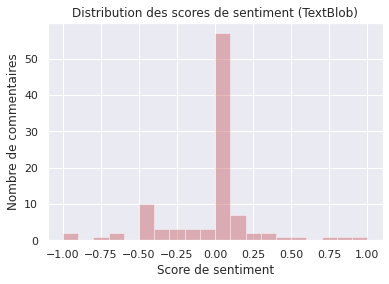

In [27]:
import seaborn as sns

# Création de l'histogramme avec seaborn
sns.set_style("darkgrid")
plot = sns.distplot(blob_scores, kde=False, bins=20, color="r")

# Ajout d'un titre et de labels aux axes
plot.set_title("Distribution des scores de sentiment (TextBlob)")
plot.set_xlabel("Score de sentiment")
plot.set_ylabel("Nombre de commentaires")

# Affichage de l'histogramme
plot.figure.show()


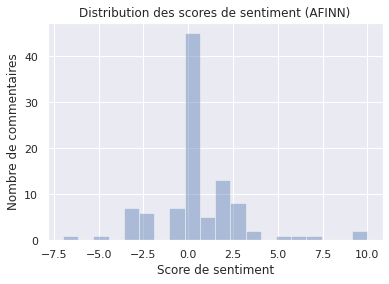

In [30]:
# Création de l'histogramme avec seaborn
sns.set_style("darkgrid")
plot = sns.distplot(afinn_scores, kde=False, bins=20, color="b")

# Ajout d'un titre et de labels aux axes
plot.set_title("Distribution des scores de sentiment (AFINN)")
plot.set_xlabel("Score de sentiment")
plot.set_ylabel("Nombre de commentaires")

# Affichage de l'histogramme
plot.figure.show()
